In [172]:
#import dependencies.
import tensorflow as tf
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.regularizers import l1

%matplotlib inline

df = pd.read_csv('data/data_stress.csv')
df.head(5)


,snoring range,respiration rate,body temperature,limb movement,blood oxygen,eye movement,hours of sleep,heart rate,Stress Levels
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [197]:

# preparing the dataset
target = 'Stress Levels'
X = df.drop(target, axis=1)
Y = df[target]

X = df.drop(target, axis=1)
Y = df[target]

X.fillna(X.mean(), inplace=True)
X.head(20)

           0          1          2          3          4          5         6  \
0  93.755636  25.621858  91.830065  16.604122  89.765550  99.754773  1.692769   
1  91.503334  24.966635  91.624283  15.831238  89.306500  98.984988  1.584950   
2  59.955610  19.971316  96.082124  10.010414  94.871750  84.931524  7.054602   
3  85.753717  23.417482  90.740552  13.840110  88.664911  96.869468  0.471788   
4  48.336481  17.212738  97.940401   6.547716  96.265896  72.423981  8.023589   

           7         8  
0  74.222971  3.033456  
1  72.951965  2.963921  
2  59.977638  0.931489  
3  68.810019  3.097248  
4  53.025628 -0.137034  


KeyError: "['Stress Levels'] not found in axis"

In [180]:
# Split the data set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

num_classes = 5


X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((504, 8), (504,), (126, 8), (126,), (1260, 8), (1260,))

In [198]:
#fix column names
X_train = X_train.rename(columns={'blood oxygen ': 'blood oxygen', 'heart rate ': 'heart rate'})
X_test = X_test.rename(columns={'blood oxygen ': 'blood oxygen', 'heart rate ': 'heart rate'})

# Data preprocessing
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X

,snoring range,respiration rate,body temperature,limb movement,blood oxygen,eye movement,hours of sleep,heart rate
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840000,74.20
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552000,72.76
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000000,60.00
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768000,68.84
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248000,53.12
...,...,...,...,...,...,...,...,...
625,69.600,46.500,92.960,10.960,90.960,89.80,3.835742,62.40
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376000,53.44
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000000,78.76
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728000,59.32


In [199]:
# Initialize the model
model = Sequential()
model.add(Dense(138, activation='relu', kernel_regularizer=l1(0.001), input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu', kernel_regularizer=l1(0.001)))
model.add(Dense(32, activation='relu', kernel_regularizer=l1(0.001)))
model.add(Dense(5, activation='softmax'))

model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 138)               1242      
                                                                 
 dense_53 (Dense)            (None, 64)                8896      
                                                                 
 dense_54 (Dense)            (None, 32)                2080      
                                                                 
 dense_55 (Dense)            (None, 5)                 165       
                                                                 
Total params: 12383 (48.37 KB)
Trainable params: 12383 (48.37 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [200]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Epoch 1/2000
16/16 [==============================] - 6s 46ms/step - loss: 6.4130 - accuracy: 0.2579 - val_loss: 2.5120 - val_accuracy: 0.3730
Epoch 2/2000
16/16 [==============================] - 0s 12ms/step - loss: 2.2514 - accuracy: 0.4563 - val_loss: 1.7461 - val_accuracy: 0.6984
Epoch 3/2000
16/16 [==============================] - 0s 10ms/step - loss: 1.6812 - accuracy: 0.6647 - val_loss: 1.6373 - val_accuracy: 0.5317
Epoch 4/2000
16/16 [==============================] - 0s 9ms/step - loss: 1.4474 - accuracy: 0.7917 - val_loss: 1.2827 - val_accuracy: 0.9524
Epoch 5/2000
16/16 [==============================] - 0s 12ms/step - loss: 1.2087 - accuracy: 0.9504 - val_loss: 1.1448 - val_accuracy: 0.9206
Epoch 6/2000
16/16 [==============================] - 0s 9ms/step - loss: 1.1330 - accuracy: 0.9028 - val_loss: 1.0315 - val_accuracy: 0.9683
Epoch 7/2000
16/16 [==============================] - 0s 10ms/step - loss: 1.0349 - accuracy: 0.9325 - val_loss: 0.9785 - val_accuracy: 0.9603
E

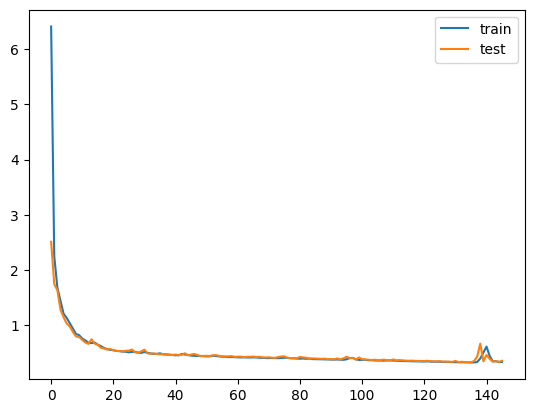

Model saved.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [201]:
# Train the model
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=2000, verbose=1, callbacks=es)

# Evaluate the model
_, accuracy_train = model.evaluate(X_train, Y_train, verbose=0)
_, accuracy_test = model.evaluate(X_test, Y_test, verbose=0)
print('Train Accuracy: {:.2f}% , Test Accuracy: {:.2f}% '.format(accuracy_train*100, accuracy_test*100))


# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Save the model
model.save('stress_model.h5')
print("Model saved.")

In [202]:

# Example input data (you should replace this with your actual input data)
new_data = X_test
expected = Y_test
expected = expected.to_numpy()
# Make predictions
predicted_stress_level = model.predict(X_test)
predicted_stress_level = np.argmax(predicted_stress_level, axis=1)
# Print the predicted stress level
issues = 0
size = len(X_test)
for i in range(0, size):
  if predicted_stress_level[i] != expected[i]:
    issues += 1
    print("Sample", i+1, "- Predicted Stress Level:", predicted_stress_level[i], "Expected:", expected[i])
print("Issues: {} out of {}".format(issues,size))

4/4 [==============================] - 0s 5ms/step
Sample 9 - Predicted Stress Level: 1 Expected: 2
Sample 19 - Predicted Stress Level: 1 Expected: 2
Sample 53 - Predicted Stress Level: 1 Expected: 2
Issues: 3 out of 126


In [203]:
from sklearn.metrics import confusion_matrix

# Predict the labels for the test data
y_pred = model.predict(X_test)
y_expected = Y_test

# Convert the predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
cm = confusion_matrix(Y_test, y_pred_classes)

# Print the confusion matrix
print(cm)
len(X_test), len(Y_test)

4/4 [==============================] - 0s 5ms/step
[[25  0  0  0  0]
 [ 0 23  0  0  0]
 [ 0  3 26  0  0]
 [ 0  0  0 22  0]
 [ 0  0  0  0 27]]


(126, 126)